In [1]:
# Import the libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = "/content/drive/MyDrive/maj us flight - january 2024.csv"
df = pd.read_csv(file_path, header=0, sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


In [3]:
df.shape

(527197, 24)

In [4]:
df.describe()

,Day_Of_Week,Dep_Delay,Dep_Delay_Tag,Arr_Delay,Flight_Duration,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Aicraft_age
count,527197.000000,527197.000000,527197.00000,527197.000000,527197.000000,527197.000000,527197.000000,527197.000000,527197.000000,527197.000000,527197.000000
mean,3.914855,12.840955,0.38288,7.776393,142.174665,5.425977,0.970540,3.242941,0.032377,5.701910,13.957877
std,2.077295,54.958138,0.48609,57.396811,73.880806,36.153713,18.004349,16.470654,1.363879,29.094514,7.752557
min,1.000000,-52.000000,0.00000,-80.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,-6.000000,0.00000,-15.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,4.000000,-2.000000,0.00000,-5.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
75%,6.000000,10.000000,1.00000,11.000000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
max,7.000000,3024.000000,1.00000,3063.000000,749.000000,3024.000000,1653.000000,1343.000000,234.000000,2027.000000,57.000000


In [5]:
df['Airline'].value_counts()


,count
Airline,
Southwest Airlines Co.,108999
Delta Air Lines Inc,74419
American Airlines Inc.,73454
United Air Lines Inc.,56102
Skywest Airlines Inc.,48378
Republic Airways,24049
JetBlue Airways,22978
Spirit Air Lines,21348
Alaska Airlines Inc.,19421


In [6]:
df.info()
df.isnull().sum()

# FlightDate → datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Day_Of_Week → category
df['Day_Of_Week'] = df['Day_Of_Week'].astype('category')

# DepTime_label → category với thứ tự Morning < Afternoon < Evening
time_order = ['Morning', 'Afternoon', 'Evening']
df['DepTime_label'] = pd.Categorical(df['DepTime_label'], categories=time_order, ordered=True)

# Airline, Dep/Arr Airport/City, Manufacturer, Model → category
categorical_cols = ['Airline', 'Dep_Airport', 'Dep_CityName', 'Arr_Airport',
                    'Arr_CityName', 'Manufacturer', 'Model']
for col in categorical_cols:
    df[col] = df[col].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527197 entries, 0 to 527196
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   FlightDate          527197 non-null  object
 1   Day_Of_Week         527197 non-null  int64 
 2   Airline             527197 non-null  object
 3   Tail_Number         527197 non-null  object
 4   Dep_Airport         527197 non-null  object
 5   Dep_CityName        527197 non-null  object
 6   DepTime_label       527197 non-null  object
 7   Dep_Delay           527197 non-null  int64 
 8   Dep_Delay_Tag       527197 non-null  int64 
 9   Dep_Delay_Type      527197 non-null  object
 10  Arr_Airport         527197 non-null  object
 11  Arr_CityName        527197 non-null  object
 12  Arr_Delay           527197 non-null  int64 
 13  Arr_Delay_Type      527197 non-null  object
 14  Flight_Duration     527197 non-null  int64 
 15  Distance_type       527197 non-null  object
 16  De

In [7]:
df['DepTime_label'].value_counts()

,count
DepTime_label,
Morning,205409
Afternoon,188313
Evening,118329


In [8]:
df['Day_Of_Week'].value_counts()

,count
Day_Of_Week,
1,88165
7,85862
2,82918
5,72107
4,71654
3,65744
6,60747


In [13]:
delay_columns = [
    'Delay_Carrier',
    'Delay_Weather',
    'Delay_NAS', # National Air System Delay
    'Delay_Security',
    'Delay_LastAircraft'
]

df['Total_Delay'] = df[delay_columns].sum(axis=1)

print(df[['Delay_Carrier', 'Delay_LastAircraft', 'Total_Delay']].head())

   Delay_Carrier  Delay_LastAircraft  Total_Delay
0              0                   0            0
1              0                   0            0
2              0                   0            0
3              0                   0            0
4              0                   0            0


/tmp/ipython-input-3322649378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


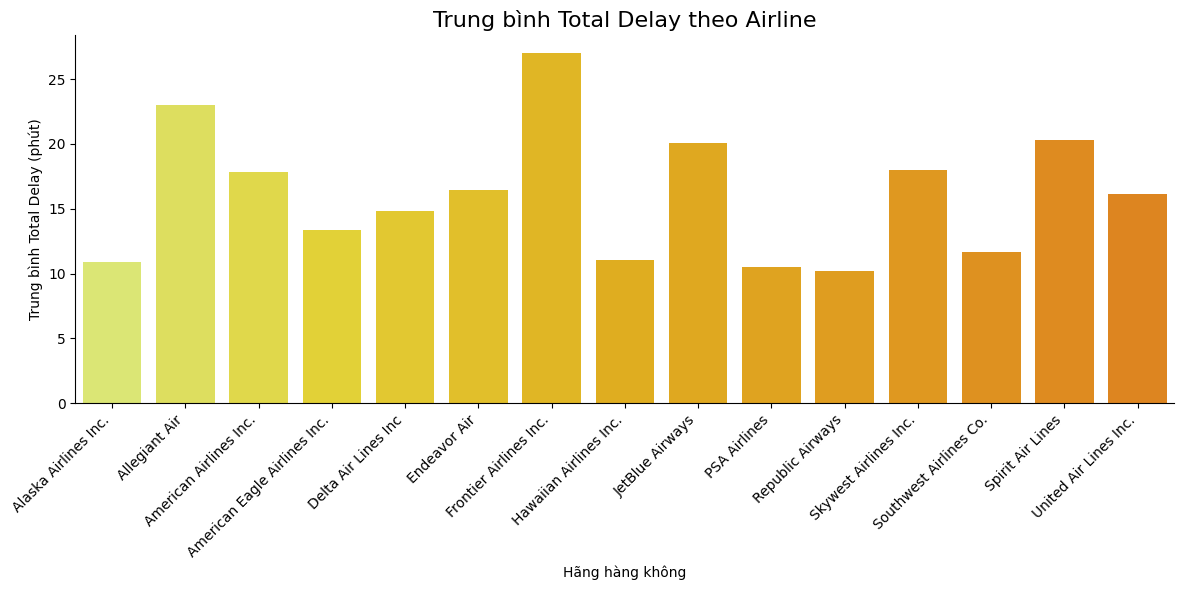

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Airline',
    y='Total_Delay',
    errorbar=None,
    palette='Wistia'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Trung bình Total Delay (phút)")
plt.xlabel("Hãng hàng không")
plt.title("Trung bình Total Delay theo Airline", fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

# Flight Delay Analysis – Multi-Airline Dataset

**Mục tiêu:** Phân tích dữ liệu chuyến bay (15 hãng) để:
1. Hiểu patterns về độ trễ khởi hành và đến.
2. So sánh độ trễ giữa các hãng, khung giờ, ngày trong tuần.
3. Xác định nguyên nhân chính gây trễ.
4. Phân tích ảnh hưởng của model & tuổi máy bay.
5. Rút ra insights thực tế cho hành khách và hãng bay.

**Dataset:** Thông tin chuyến bay: FlightDate, Airline, Dep/Arr Airport, Dep/Arr Delay, Tail_Number, Model, Aircraft_age, nguyên nhân trễ, …


/tmp/ipython-input-1601229268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DepTime_label', y='Dep_Delay', data=df, palette='Set2')


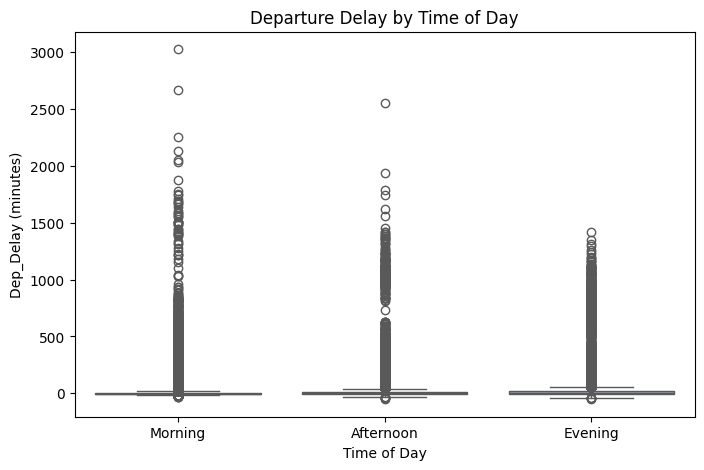

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DepTime_label', y='Dep_Delay', data=df, palette='Set2')
plt.title('Departure Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Dep_Delay (minutes)')
plt.show()

/tmp/ipython-input-2234889225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_Of_Week', y='Dep_Delay', data=df, palette='Pastel1')


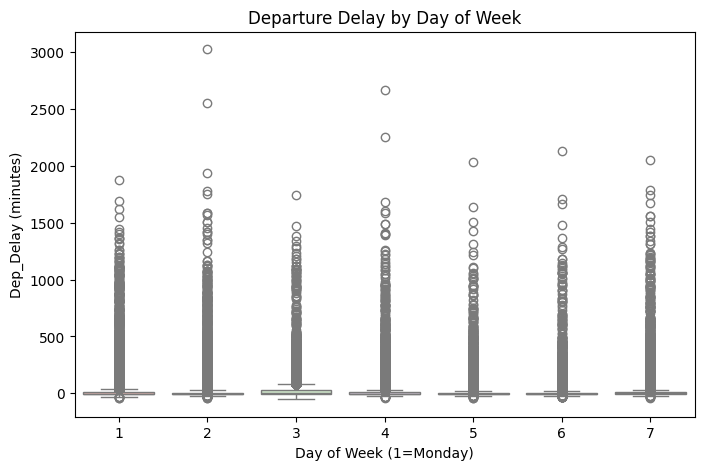

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Day_Of_Week', y='Dep_Delay', data=df, palette='Pastel1')
plt.title('Departure Delay by Day of Week')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Dep_Delay (minutes)')
plt.show()

/tmp/ipython-input-2645887453.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = df.groupby('Airline')['Dep_Delay'].mean().sort_values(ascending=False)
/tmp/ipython-input-2645887453.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


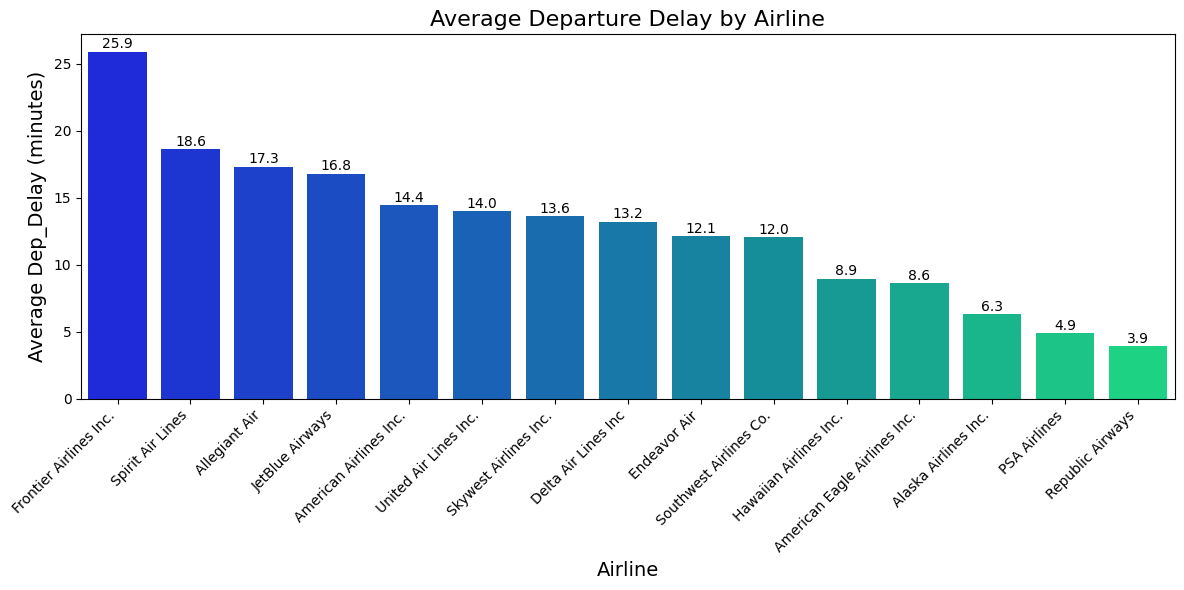

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_delay = df.groupby('Airline')['Dep_Delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_delay.index,
    y=avg_delay.values,
    palette=sns.color_palette("winter", n_colors=len(avg_delay)),
    order=avg_delay.index)
plt.title('Average Departure Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Average Dep_Delay (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotation
for i, v in enumerate(avg_delay.values):
    plt.text(i, v + max(avg_delay.values)*0.01, f"{v:.1f}", ha='center', fontsize=10)

plt.show()

In [28]:
print("Giá trị thực tế trong DepTime_label:")
print(df['DepTime_label'].unique())

Giá trị thực tế trong DepTime_label:
['Morning', 'Afternoon', 'Evening', NaN]
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']


/tmp/ipython-input-613764924.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_df = df.groupby(['DepTime_label', 'Day_Of_Week'])['Dep_Delay'].mean().reset_index()


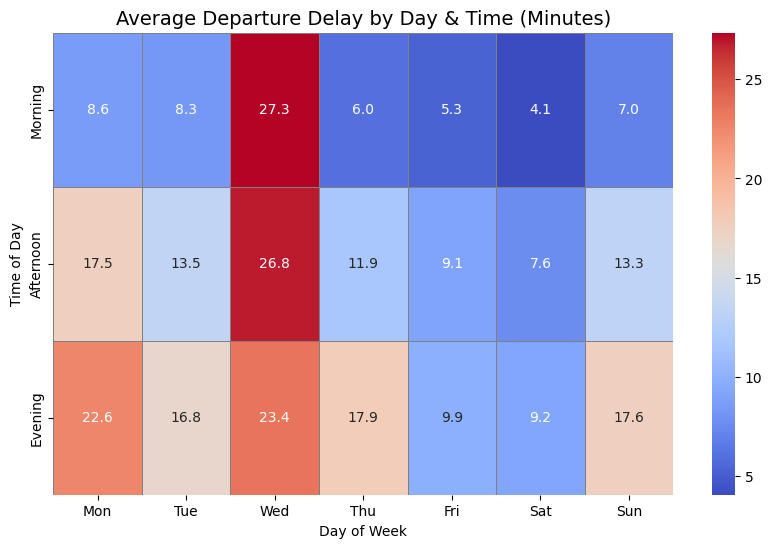

In [29]:
# 1. Tạo heat_df: Tính trung bình độ trễ (Dep_Delay)
heat_df = df.groupby(['DepTime_label', 'Day_Of_Week'])['Dep_Delay'].mean().reset_index()
heat_df = heat_df.rename(columns={'Dep_Delay': 'Avg_Dep_Delay'})

# 2. Tạo heatmap_data: Chuyển đổi heat_df sang định dạng ma trận
heatmap_data = heat_df.pivot(index='DepTime_label', columns='Day_Of_Week', values='Avg_Dep_Delay')

# 3. Sắp xếp thứ tự cho biểu đồ (ĐÃ SỬA LỖI KHÔNG KHỚP)
time_order = ['Morning', 'Afternoon', 'Evening']
day_order = [1, 2, 3, 4, 5, 6, 7] # 1=Monday đến 7=Sunday

heatmap_data = heatmap_data.reindex(index=time_order)
heatmap_data = heatmap_data[day_order]

# 4. Vẽ Heatmap và Lưu Ảnh
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)

# Thay thế nhãn trục X (số 1-7) bằng tên ngày (Mon-Sun)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(len(day_labels)) + 0.5, day_labels, rotation=0)

plt.title('Average Departure Delay by Day & Time (Minutes)', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')

# Lưu ảnh
plt.savefig('average_delay_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Từ đây có thể thấy Sáng và Trưa thứ 4 là ngày thời điểm thường xuyên bị
delay nhất**
Chúng ta sẽ tìm ra xem nguyên nhân nào gây trễ nhiều nhất vào thời điểm này

In [35]:
df['Day_Of_Week'] = df['Day_Of_Week'].astype(int)

# Lọc Morning Wednesday
subset = df[(df['DepTime_label']=='Morning') & (df['Day_Of_Week']==3)]
subset = df[(df['DepTime_label']=='Afternoon') & (df['Day_Of_Week']==3)]

# Tổng số phút trễ theo nguyên nhân
delay_cols = ['Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_LastAircraft']
delay_sum = subset[delay_cols].sum()

print("Tổng số phút trễ theo nguyên nhân (Morning and Afternoon Wednesday):")
print(delay_sum)

Tổng số phút trễ theo nguyên nhân (Morning and Afternoon Wednesday):
Delay_Carrier         152471
Delay_Weather          26170
Delay_NAS             122729
Delay_Security           837
Delay_LastAircraft    364665
dtype: int64


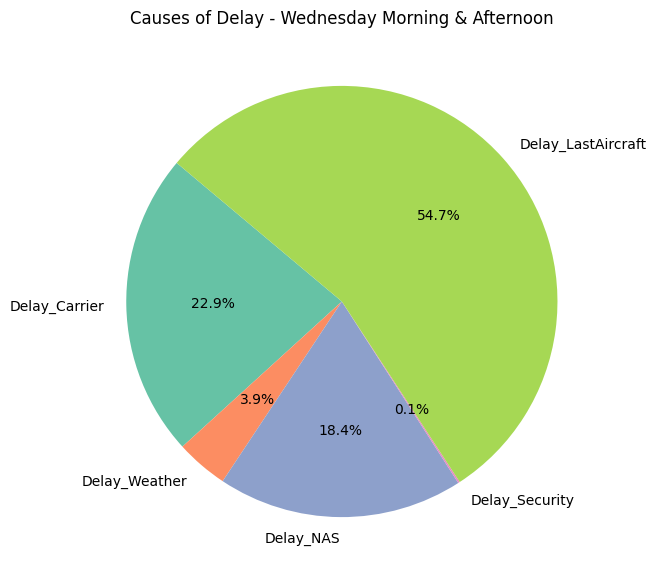

In [37]:
plt.figure(figsize=(7,7))
plt.pie(delay_sum, labels=delay_sum.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(delay_sum)))
plt.title('Causes of Delay - Wednesday Morning & Afternoon')
plt.show()

## 💡 Tóm Tắt Insight Nguyên Nhân Trễ Chuyến Bay

Nguyên nhân **Trễ Chuyến Bay Dây Chuyền (Delay_LastAircraft)** là yếu tố áp đảo, chiếm tới **54.7%** tổng số lần chậm trễ. Điều này cho thấy sự chậm trễ từ chuyến bay trước là nguyên nhân chính gây ra sự gián đoạn lịch trình.

---

### Các Nguyên Nhân Quan Trọng Khác

| Nguyên Nhân | Tỷ Trọng | Nội Dung |
| :--- | :--- | :--- |
| **Trễ do Hãng Bay (Delay_Carrier)** | **22.9%** | Đứng thứ hai, liên quan đến các vấn đề vận hành nội bộ của hãng (kỹ thuật, phi hành đoàn, v.v.). |
| **Trễ do Hệ thống Không Lưu (Delay_NAS)** | **18.4%** | Gây ra bởi tắc nghẽn không phận hoặc các yếu tố ngoại cảnh thuộc hệ thống không lưu. |

### Tác Động Gần Như Không Đáng Kể

* **Trễ do Thời Tiết (Delay_Weather)** chỉ chiếm **3.9%**.
* **Trễ do An Ninh (Delay_Security)** gần như không có tác động, chỉ **0.1%**.

---

### Kết Luận Hành Động

* **Đối với Hành khách**: Nếu bay vào sáng/trưa/chiều giữa tuần (Thứ Tư), cần lưu ý nguy cơ trễ cao nhất là do các **vấn đề vận hành dây chuyền**.
* **Đối với Hãng Hàng không**: Cần tập trung cải thiện hiệu quả **quay vòng máy bay (turnaround time)** và tối ưu hóa lịch trình để giảm thiểu tác động của trễ dây chuyền, đặc biệt vào giữa tuần.